#FACEBOOK FRIEND RECCOMENDATION USING GRAPH MINING
####WE ARE GIVEN WITH THE SOURCE NODE AND DESTINATION NODE THAT ARE FRIENDS. WEHAVE TO PREDICT WHETHER THE SOURCE NODE AND DESTINATION CAN BE FRIENDS ARE NOT.
#####IT IS SIMPLE BINARY CLASSIFICATION TASK.BUT THE MAIN THING IS WE ARE NOT PROVIDED WITH THE FEATURES.
####WE HAVE TO PERFORM THE FEATURE EXTRACTION AND PERFORM THE FEATURE ENGINEERING AND GET THE FEATURES AND EMPLOY INTO THE MODELS.
* FOR THIS WE GONNA USE GRAPH BASED LIBRARY OF THE PYTHON CALLED NETWORKX WHICH IS EXTENSIVELY USEFUL.


In [0]:

import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.0MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1l1adJnTgeHULVuoLdTRyqi25-z6shBSL' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1l1adJnTgeHULVuoLdTRyqi25-z6shBSL


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  
data = pd.read_csv('train.csv')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
#to visyualise the graphs in python there is extensive library
#called networkx
#we eill read the graph and using it we viusalise the various parameters
#we are creating graph g using networkx
#we will measure the indegree and outdegree
#indegree is the number of edges going from vertex
#oytdegree is the number of edges coming towards the vertex
#we use here digraph() which is nothing but directedgraph


In [0]:
import pandas as pd
data=pd.read_csv('train.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
source_node         int64
destination_node    int64
dtypes: int64(2)
memory usage: 144.0 MB
None
   source_node  destination_node
0            1            690569
1            1            315892
2            1            189226
3            2            834328
4            2           1615927


####networkx has a read_edgelist which reads the edges from the vertices we have .directed graph is generated from the edges that read.


In [0]:
import networkx as nx
g=nx.read_edgelist('train.csv',delimiter=',',create_using=nx.DiGraph())

In [0]:
print(nx.info(g))


Name: 
Type: DiGraph
Number of nodes: 1862222
Number of edges: 9437520
Average in degree:   5.0679
Average out degree:   5.0679


In [0]:
pd.read_csv('train.csv',nrows=50).to_csv('train1.csv',header=False,index=False)
subgraph1=nx.read_edgelist('train1.csv',delimiter=',',create_using=nx.DiGraph())


Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


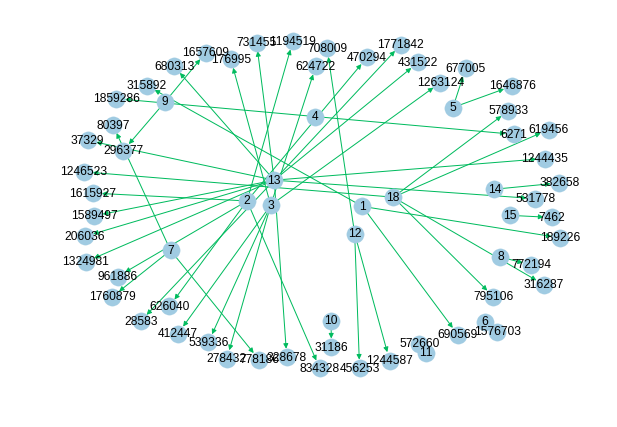

In [0]:
pos=nx.spring_layout(subgraph1)
nx.draw(subgraph1,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig('graph_sample.pdf')
print(nx.info(subgraph1))

In [0]:

# g is the digraph which is nothing but directed graph
print(type(g))
print("number of unique people is ",len(g.nodes()))

<class 'networkx.classes.digraph.DiGraph'>
number of unique people is  1862222


In [0]:
#g is the directed graph we have
#g consists of nodes and vertices
print(len(g.edges()))

9437520


#### WE ARE GIVEN WITH THE SOURCE NODE AND DESTINATION NODE
* WE GENERATE THE DIRECTED GRAPH OUT OF THE DATA OF SOURCE NODE AND DESTINATION NODE.\
* WE PERFORM THE EXPLORATORY DATA ANALYSIS OF THE DATA .
* WE WILL SEE THE INDEGREE AND OUTDEGREE OF NODES
* INDEGREE IS THE NUMBER OF DIRECTED EDGES COMING TOWARDS NODE
* OUTDEGREE IS THE NUMBER OF DIRECTED EDGES GOING FROM THE NODE.
* WE WILL CHECK THE NUMBER OF NEIGHBORS OF THE NODE SO THAT WE CAN PERFORM THE FEATURE EXTRACTION AND DO FEATURE ENGINEERING.

In [0]:
#edges is nothing but total number of connections overall
#where the edges represent the number of persons present in the network
#we are going to perform exploratory data analysis over the data 
#to check whether outliers are present and see the data how it is


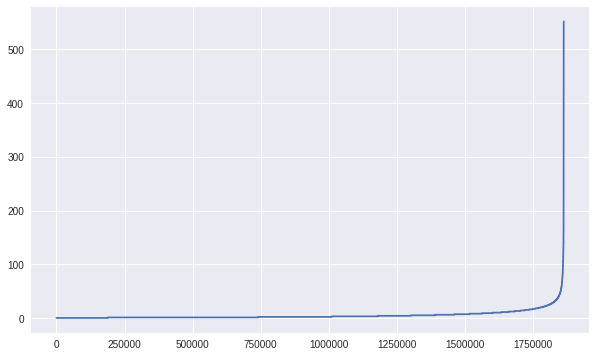

In [0]:
import matplotlib.pyplot as plt
indegreedist=list(dict(g.in_degree()).values())
indegreedist.sort()
#whenever it gives iopbrate exceeded
#ucan visualise the data using the graph
plt.figure(figsize=(10,6))
plt.plot(indegreedist)
plt.show()

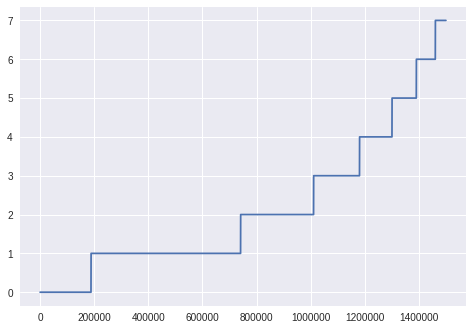

In [0]:
#see th plot closely we are taking the 1.5 million nodes instead of 1.86 million nodes
indegreedist1=list(dict(g.in_degree()).values())
indegreedist1.sort()
plt.plot(indegreedist1[:1500000])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


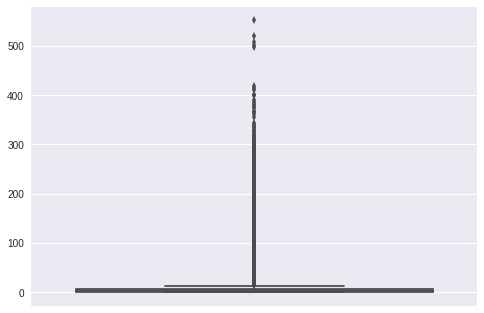

In [0]:
#box plot is the important plot in exploratory data analysis
#box plot is mostly used to determine the outliers
#box plot we can see median,25percentile,75percentile,interquratile range
#violin plot is better than box plot because we can see the probability distribution of vcalues
sns.boxplot(y=indegreedist)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


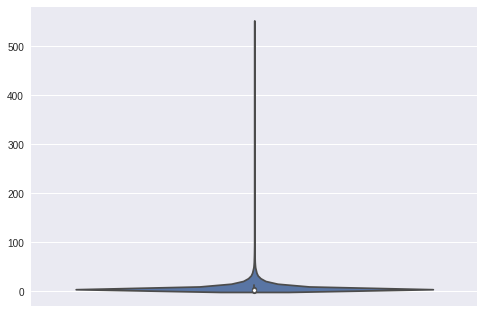

In [0]:
sns.violinplot(y=indegreedist)

In [0]:
#percentiles play imporatant role incase of exploratory data analysis
#percentiles used to see outliers more clkearly
#by observing the outliers from box plot and violinplot and percentiles
#we can remove outliers in data
#u have the list in sorted order u can print the percentiles
for i in range(0,11):
  print(90+i,'percentile value is',np.percentile(indegreedist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [0]:
#observations from above graph:
#till 99 percent number of followers each person following is 40
#99 percent to 100 percent number of followers increased to 552
#this is the way we see outliers
#we can remove outliers if we want
for j in range(10,100,10):
  print(np.percentile(indegreedist,99+(i/100)))

42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0


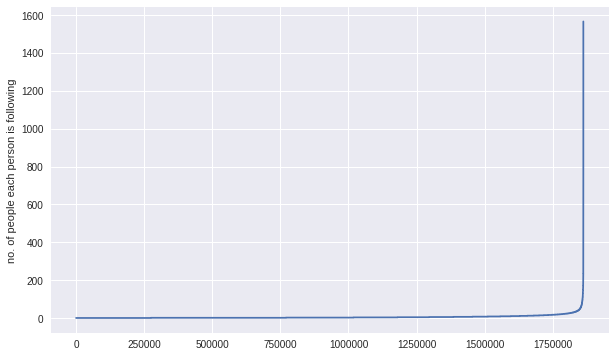

In [0]:
#now we are seeing other persepctive
#we see how many person each person is following like 
#we can see average and can eliminate outliers
outdegreedist=list(dict(g.out_degree()).values())
outdegreedist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegreedist)
plt.ylabel("no. of people each person is following")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


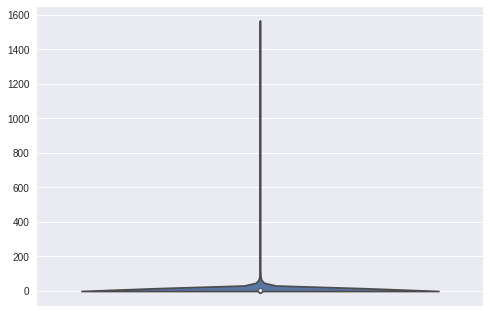

In [0]:
sns.violinplot(y=outdegreedist)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


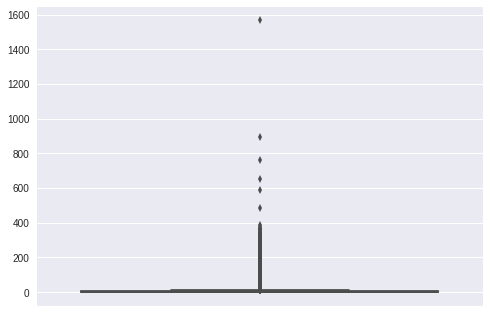

In [0]:
sns.boxplot(y=outdegreedist)

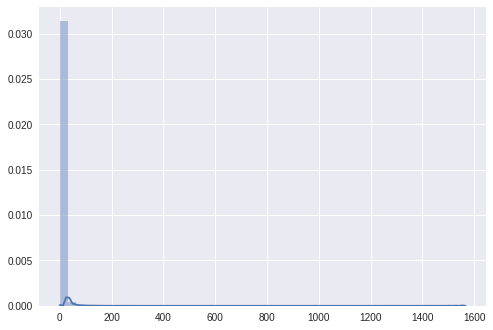

In [0]:
#if u observe one person is following  people
#we can consider and eliminate and eliminate the outliers
sns.distplot(outdegreedist)
#using the distribution plot we can see histoigram and pdf


* BOX PLOTS, VOILIN PLOTS AND PERCENTILES ARE USED EXTENSIVELY TO CHECK THE OUTLIERS ION THE DATA .
*  AS A PART OF FEATURE ENGINEERING WE CAN RESTRICT THE FEATURES BY SETTING UP THE THRESHOLDS.
* WE CAN ALSO ANALYSE THE HOW DATA IS BEHAVING.

In [0]:
import random
import csv
import pickle
r=csv.reader(open('train.csv','r'))
print(r)

In [0]:
edges=dict()
for edge in r:
  edges[edge[0],edge[1]]=1


In [0]:
print(type(edges))

<class 'dict'>


In [0]:
 for k,v in sorted(edges.items())[:5]:
    print (k)
    print(v)

('1', '189226')
1
('1', '315892')
1
('1', '690569')
1
('10', '31186')
1
('1000', '1319713')
1


In [0]:
missingedges = set([])
while (len(missingedges)<9437519):
  a=random.randint(1,1862220)
  b=random.randint(1,1862220)
  a=str(a)
  b=str(b)
  tmp=edges.get(('a','b'),-1)
  if tmp==-1 and a!=b:
    try:
      if nx.shortest_path_length(g,source=a,target=b)>2:
        missingedges.add((a,b))
      else:
        continue
    except:
      missingedges.add((a,b))
  else:
    continue

In [0]:
import random
import os
import pickle
r = csv.reader(open('train.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1
    missing_edges = set([])
    while (len(missing_edges)<945):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue             
        else:
            continue
    #pickle.dump(missing_edges,open('data/after_eda/missing_edges_final.p','wb'))


### after exploratory data analysis generating the edges that are not friends and generating the edges tht of friends. dividing the data into train test split. making the train data as csv file and test data as csv file.

linkf for traindata after eda https://drive.google.com/open?id=1lcxzVZ0-MkPmoH3lS35Q8rRfrecKSXb1
link for test data after eda  https://drive.google.com/open?id=1_KN7S8zfHdrkRjRYOEtBxBVq8JrGxPXD

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.7MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1lcxzVZ0-MkPmoH3lS35Q8rRfrecKSXb1' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1lcxzVZ0-MkPmoH3lS35Q8rRfrecKSXb1


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_after_eda.csv')  
traindata = pd.read_csv('train_after_eda.csv')

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1_KN7S8zfHdrkRjRYOEtBxBVq8JrGxPXD' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1_KN7S8zfHdrkRjRYOEtBxBVq8JrGxPXD


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_after_eda.csv')  
testdata = pd.read_csv('test_after_eda.csv')

In [0]:
traindata.head(5)


,273084,1505602
0,912810,1678443
1,365429,1523458
2,527014,1605979
3,1228116,471233
4,866691,535232


In [0]:
testdata.head(5)

,848424,784690
0,1248963,444518
1,264224,132395
2,549680,326829
3,875380,1394902
4,1315983,196578


In [0]:
print(traindata.shape)
print(testdata.shape)

(15100029, 2)
(3775007, 2)


## CLASS LABEL FOR TRAIN DATA AND TEST DATA AFTER EXPLORATORY DATA ANALYSIS

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=19mviN_yeJIfakb4kU5NfKdQlOQtaQ-kH' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

19mviN_yeJIfakb4kU5NfKdQlOQtaQ-kH


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_y.csv')  
trainclasslabel = pd.read_csv('train_y.csv')

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1H6qybuXr8i_USWu3k3ulXEOurc-SElUh' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1H6qybuXr8i_USWu3k3ulXEOurc-SElUh


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_y.csv')  
testclasslabel = pd.read_csv('test_y.csv')

In [0]:
print(traindata.shape)
print(testdata.shape)
print(trainclasslabel.shape)
print(testclasslabel.shape)

(15100029, 2)
(3775007, 2)
(15100029, 1)
(3775007, 1)


# TRAIN POSITIVE DATA 

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1XLHsIRXKLx9TA9nuC1SS7JDkLyRVmo69' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1XLHsIRXKLx9TA9nuC1SS7JDkLyRVmo69


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_pos_after_eda.csv')  
trainposdata = pd.read_csv('train_pos_after_eda.csv')

In [0]:
print(trainposdata.shape)

(7550014, 2)


In [0]:
print(trainposdata.head(2))

   273084  1505602
0  912810  1678443
1  365429  1523458


###directed graph is created uisng netwokx library

In [0]:
import networkx as nx
train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


#  TASKS FOR THE ASSIGNMENT ARE 
#### *1. ADD THE FEATURE OF PREFFERENTIAL ATTACHMENT 
* PREFERENTUIAL ATTACHMENT IS NOTHING BUT THE MULTIPLICATION OF THE NEIGHBORS OF THE SOURCE VERTEX AND THE DESTIANTION VERTEX.
* OBTAIN THE NEIGHBORS OF THE SOURCE NODE FROM THE DIGRAPH AND NEIGHBORS OF DESTIANTION NODE FROM THE DIGRAPH AND GET THE MULTIPLIED VALUE OF THEM.


#featurizing models

In [0]:
import random
import os
if os.path.isfile('train_after_eda.csv'):
    filename = "train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    print('yes')
    

yes


In [0]:
if os.path.isfile('test_after_eda.csv'):
    filename = "test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    print('yes')

yes


In [0]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [0]:
df_final_train = pd.read_csv('train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,940996,1780134,1


In [0]:
df_final_test = pd.read_csv('test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,265848,1709569,1


In [0]:

def preferentialattachment(a,b):
    try:
        if len(list(train_graph.neighbors(a))) == 0  | len(list(train_graph.neighbors(b))) == 0:
            return 0
        sim = (len(list(train_graph.successors(a))))*len(list(train_graph.successors(b)))
    except:
        return 0
    return sim

In [0]:
df_final_train['preferentialattachment'] = df_final_train.apply(lambda row:
                                            preferentialattachment(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferentialattachment'] = df_final_test.apply(lambda row:preferentialattachment(row['source_node'],row['destination_node']),axis=1)

### WE HAVE ADDED THE PREFERENTIAL ATTACHEMNET AS THE FEATURE
# AS A PART OF THE TASK 2 WE HAVE TO ADD THE DOT PRODUCT OF SVD FEATURES AS THE FEATURE
#### WE WILL ADD THE DOT PRODUCT OF THE SVD FEATURES OF THE SOURCE NODE  AND DESTINATION NODE.


#svd features

In [0]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [0]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [0]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [0]:
from scipy.sparse.linalg import svds, eigs
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [0]:
df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']]=df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']]=df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)    


In [0]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,preferentialattachment,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6
0,273084,1505602,1,120,-1.666334e-13,4.613820e-13,1.043041e-05,6.678033e-13,2.451105e-13,3.584945e-12,-2.038018e-11,5.397910e-13,1.068943e-06,1.192461e-12,2.279488e-12,3.581202e-12
1,940996,1780134,1,15,-3.794766e-14,1.244412e-14,2.194572e-13,3.021796e-14,3.641091e-14,2.632663e-17,-1.122341e-14,4.277216e-15,3.364002e-13,7.015792e-15,4.663574e-15,1.613188e-16
2,944692,559417,1,0,-2.715901e-13,1.596690e-11,6.804195e-11,3.135976e-14,3.712109e-13,7.639383e-16,-5.758625e-20,1.193430e-20,-1.261849e-19,4.548044e-20,-2.548690e-19,-2.305486e-19
3,23128,259461,1,14,-4.271045e-14,6.928649e-14,4.971937e-11,4.337006e-15,2.092274e-13,4.169015e-16,-8.956031e-12,6.115164e-12,8.767823e-11,1.292802e-13,3.273857e-12,6.761913e-15
4,746990,256703,1,56,-4.095820e-13,2.609395e-11,5.038567e-11,7.486272e-10,2.369835e-11,1.123254e-12,-1.018688e-11,2.045000e-11,3.318546e-11,7.185457e-10,2.072919e-11,7.979067e-13


In [0]:
a=df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
a=np.array(a)
c=df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
c=np.array(c)
trainsource=np.concatenate((a,c), axis=1)


In [0]:
print(trainsource.shape)

(100002, 12)


In [0]:
b=df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)  
b=np.array(b)
d= df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
d=np.array(d)
traindestination=np.concatenate((b,d), axis=1)

In [0]:
print(traindestination.shape)

(100002, 12)


In [0]:
l1=[]
for i,j in zip(trainsource,traindestination):
  l1.append(np.dot(i,j))
print(len(l1))
print(l1)

100002
[1.3388284592882279e-11, 2.635582275283058e-25, 1.5727024917014194e-18, 4.387529797534328e-21, 5.52743487883807e-19, 4.358280343532083e-25, 1.2751990794397877e-22, 5.4781621674667206e-12, 1.591924877464077e-08, 1.3670154880094117e-23, 1.7554567443991688e-11, 0.009995478732139003, 2.4722029639595633e-10, 5.408891872131252e-20, 7.869767110041419e-19, 1.4143011588465441e-21, 6.598630913950801e-23, 1.9442908605729775e-24, 6.3040835792122985e-22, 6.384630031022094e-18, 6.617049239997935e-18, 1.3976694668559196e-22, 1.3547171136437078e-29, 2.42388125388005e-15, 1.4125645316610534e-20, 2.0067439494660023e-15, 3.658286094043374e-21, 9.033401772973797e-11, 5.146945317596167e-08, 3.7322571780550647e-13, 2.9260928520409604e-23, 1.9313379590383494e-08, 1.0856540126489081e-09, 0.012235229287688925, 6.386373454170753e-18, 1.775810629020012e-18, -1.5824857013874239e-38, 1.071550090474982e-25, 2.583604747923698e-16, 1.4674814788499142e-23, 1.0695437644676897e-16, 3.4167553714637245e-24, 2.57582

## for testdata

In [0]:
e=df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
e=np.array(e)
f=df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
f=np.array(f)
testsource=np.concatenate((e,f), axis=1)

In [0]:
g=df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
g=np.array(g)
h=df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
h=np.array(h)
testdestination=np.concatenate((g,h), axis=1)

In [0]:
print(testsource.shape)
print(testdestination.shape)

(50002, 12)
(50002, 12)


In [0]:
l2=[]
for i,j in zip(testsource,testdestination):
  l2.append(np.dot(i,j))
print(len(l2))
print(l2)

50002
[2.053152033351429e-16, 1.5196451595416992e-20, 4.4280882933502624e-23, 5.726292137320406e-23, 5.4502485034853366e-21, 2.3618589064562964e-20, 1.2563322867953157e-18, 1.676171336495079e-22, 2.3797169859916846e-19, 0.0001341972867858797, 1.0260939864624675e-12, 1.5198426986304264e-20, 1.3574886378719787e-26, 9.392823263441166e-17, 9.565008869516494e-18, 4.047216531707545e-15, 7.079341558177973e-14, 1.5603770834621142e-09, 1.6467633096616887e-20, 3.060414569068566e-19, 1.0189971884415948e-17, 6.660345129776298e-22, 1.9207686617786745e-24, 2.84457536768817e-24, 1.8748366997265342e-19, 1.5113525161785244e-20, 6.223111889651756e-17, 4.403814679513013e-20, 9.404708087051444e-32, 8.760341196233633e-22, 4.4973877469404214e-23, 5.06224621258834e-19, 4.0892979929759425e-13, 6.959408648450608e-09, 2.472647732938875e-19, 8.657344266834e-23, 3.897911020798833e-24, 3.8933610217996324e-23, 3.7188467892755083e-17, 2.6534691071513585e-21, 6.049696769593899e-09, 3.2351123231809743e-26, -2.84643765

#making data frame out of the features preferential attachment,svd features for train and test

In [0]:
datafratrain=pd.DataFrame()
datafratrain['preferentialattachment']=df_final_train['preferentialattachment']
datafratrain['svdfeatures']=l1
datafratrain.head(5)

,preferentialattachment,svdfeatures
0,120,1.338828e-11
1,15,2.635582e-25
2,0,1.572702e-18
3,14,4.387530e-21
4,56,5.527435e-19


In [0]:
datafratest=pd.DataFrame()
datafratest['preferentialattachment']=df_final_test['preferentialattachment']
datafratest['svdfeatures']=l2
datafratest.head(5)

,preferentialattachment,svdfeatures
0,54,2.053152e-16
1,33,1.519645e-20
2,20,4.428088e-23
3,6,5.726292e-23
4,70,5.450249e-21


In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

### APPENDING THE ENGINEERED FEATURES FOR THE EXISTING FEATURES BEFORE EMPLOYING INTO THE MODEL

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('storage_sample_stage4.h5')  
#trainposdata = pd.read_csv('train_pos_after_eda.csv')

In [0]:
#reading
from pandas import read_hdf
df_final_trainfinal = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_testfinal = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
df_final_trainfinal['preferential_attachment']=datafratrain['preferentialattachment']
df_final_testfinal['preferential_attachment']=datafratest['preferentialattachment']

In [0]:
df_final_trainfinal['svdfeatures']=datafratrain['svdfeatures']
df_final_testfinal['svdfeatures']=datafratest['svdfeatures']

In [0]:
print(df_final_trainfinal.shape)
print(df_final_testfinal.shape)


(100002, 56)
(50002, 56)


In [0]:
df_final_trainfinal.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment', 'svdfeatures'],
      dtype='object')

In [0]:
y_train = df_final_trainfinal.indicator_link
y_test = df_final_testfinal.indicator_link

In [0]:
df_final_trainfinal.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_testfinal.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
df_final_trainfinal.head(3)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment,svdfeatures
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,120,1.338828e-11
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,15,2.635582e-25
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,1.572702e-18


# ADDING THE FEATURES PREFERNTIAL ATTACHMENT AND SVD FEATURES IMPROVED THE F1 SCORE . MAXIMUM VALUE OF THE F1 SCORE IS 1. IN CASE OF USING THE RANDOM FOREST CALSSIFIER IT INCREASED THE F1 SCORE FORM 0.89 TO 0.925

Estimators =  10 Train Score 0.9314931929343594 test Score 0.9256049944668323
Estimators =  50 Train Score 0.9283646661720293 test Score 0.9221902017291067
Estimators =  100 Train Score 0.9313374212621045 test Score 0.9248922073824797
Estimators =  250 Train Score 0.931073800931011 test Score 0.9254793021444957
Estimators =  450 Train Score 0.931554645550843 test Score 0.9256010601375656
Estimators =  1000 Train Score 0.931014311083255 test Score 0.925583350851377


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

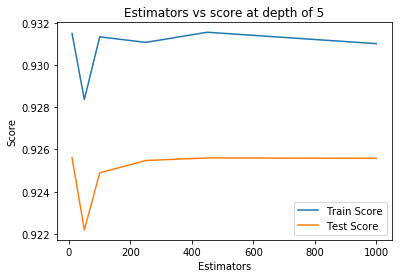

In [0]:
estimators = [10,50,100,250,450,1000]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_trainfinal,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_trainfinal))
    test_sc = f1_score(y_test,clf.predict(df_final_testfinal))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.legend()
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9141565151243013 test Score 0.9018627702298557
depth =  9 Train Score 0.9617079579963395 test Score 0.9310184794532108
depth =  11 Train Score 0.9695167738923954 test Score 0.9321459399145245
depth =  15 Train Score 0.9747607317368655 test Score 0.9334791018417291
depth =  20 Train Score 0.974499677211104 test Score 0.9331764804739197
depth =  35 Train Score 0.974502305588909 test Score 0.9334173757747662
depth =  50 Train Score 0.974502305588909 test Score 0.9334173757747662
depth =  70 Train Score 0.974502305588909 test Score 0.9334173757747662
depth =  130 Train Score 0.974502305588909 test Score 0.9334173757747662


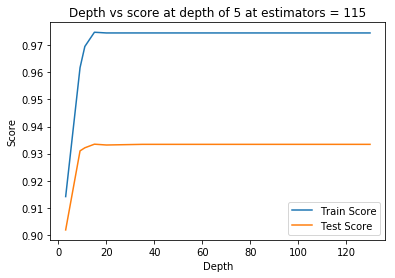

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_trainfinal,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_trainfinal))
    test_sc = f1_score(y_test,clf.predict(df_final_testfinal))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_trainfinal,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.97210003 0.9728146  0.96852436 0.97239179 0.97357086]
mean train scores [0.97341982 0.97373891 0.96976026 0.97321157 0.97503279]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_trainfinal,y_train)
y_train_pred = clf.predict(df_final_trainfinal)
y_test_pred = clf.predict(df_final_testfinal)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9753823802413334
Test f1 score 0.9332716840755764


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


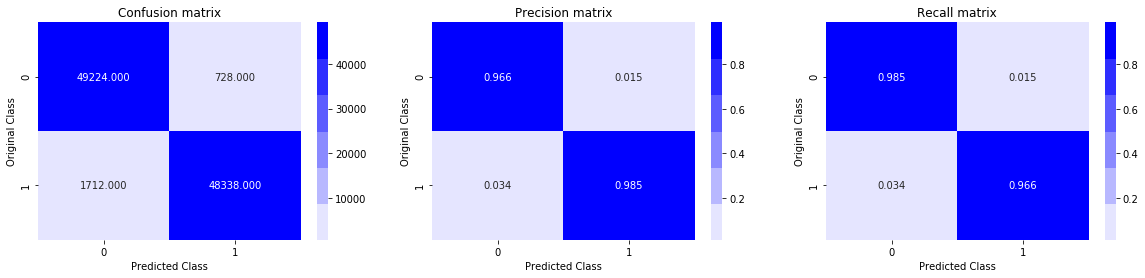

Test confusion_matrix


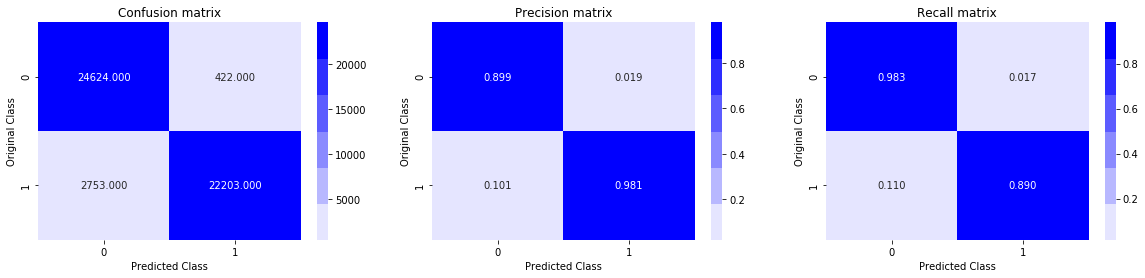

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

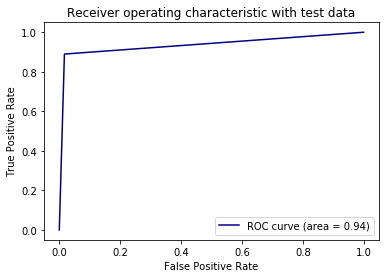

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

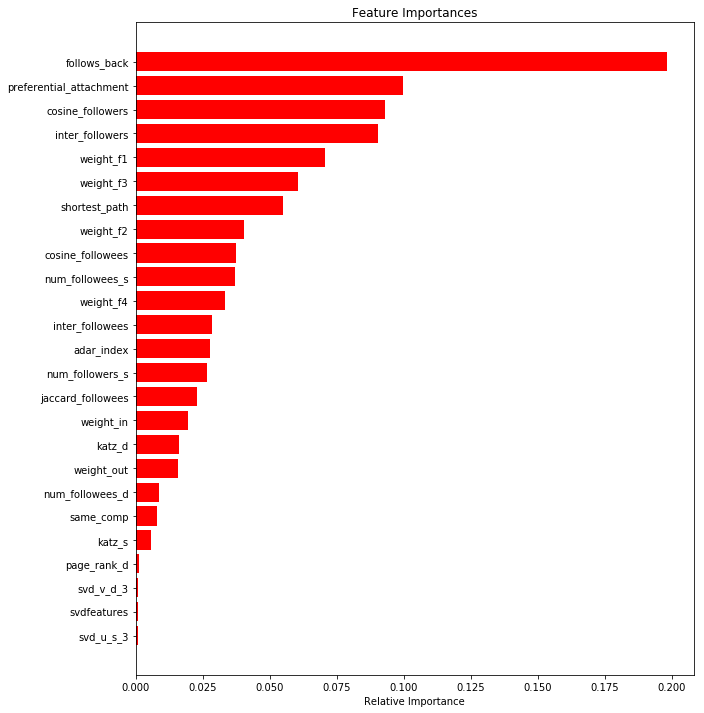

In [0]:
features = df_final_trainfinal.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# NOT USING THE PREFERENTIAL ATTACHMENT AND SVD DOT PRODUCT FEATURES WE WERE ABLE TO ACHIEVE THE AUC VALUE OF 0.93 AFTER USING THE PREFERENTIAL ATTACHMENT AND SVD DOT PRODUCT FEATURES WE ARE ABLE TO ACHIEVE THE AUC VALUE OF 0.94. WHICH IS GOOD . AND THE PREFERENTIAL ATTACHEMENT EMERGED AS THE SECOND MOST IMPORTANT FEATURE AFTER THE SHORTEST PATH WHICH ADDED VALUE TO THE MODEL INCREASING THE F1SCORE AND AREA UNDER CURVE.

## AS A PART OF TASK 3  PERFORMING THE MODEL WITH XGBOOST CLASSIFIER WITH HYPERPARAMETER TUNING .
#### FOR THE HYPER PARAMETER  TUNING WE HAVE CHOOSEN RANDOM SEARCH CV .

In [0]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10,20],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,cv=10,scoring='f1',random_state=25)
random_cfl.fit(df_final_trainfinal,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 59.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 107.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 113.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 118.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 127.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 196.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 202.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 207.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10, 20], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [0]:
x_cfl=XGBClassifier(n_estimators=1000,subsample=1,learning_rate=0.05,colsample_bytree=0.5,max_depth=10)
x_cfl.fit(df_final_trainfinal,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_train_pred = x_cfl.predict(df_final_trainfinal)
y_test_pred = x_cfl.predict(df_final_testfinal)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 1.0
Test f1 score 0.9332491316703505


Train confusion_matrix


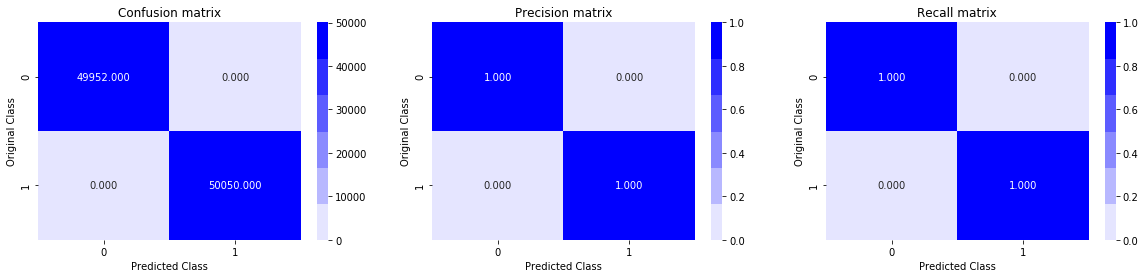

Test confusion_matrix


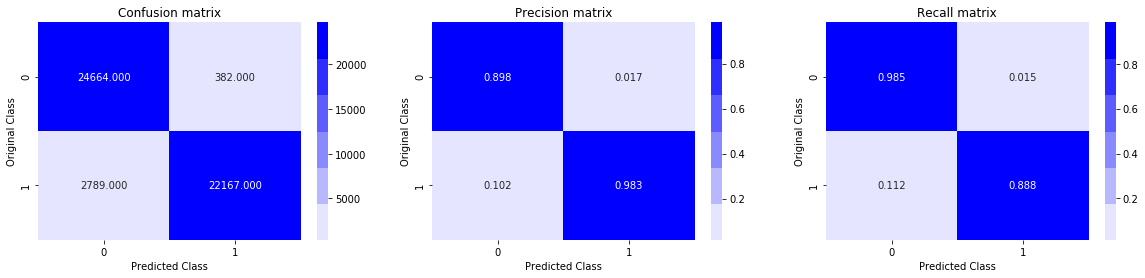

In [0]:
%matplotlib inline
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

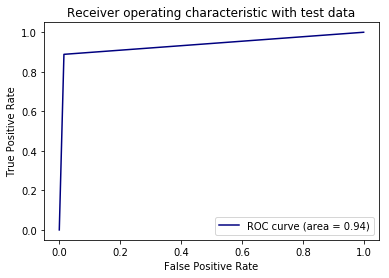

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

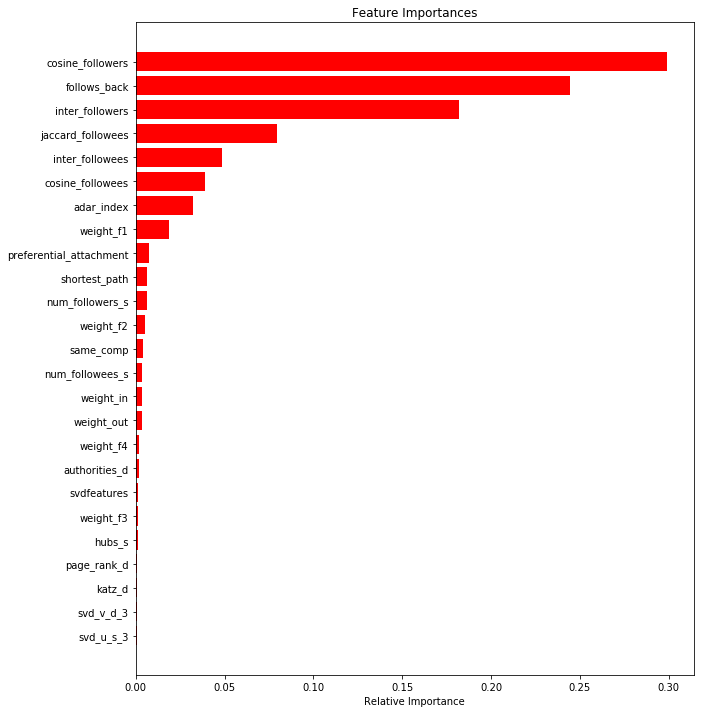

In [0]:
features = df_final_trainfinal.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
import pandas as pd
dta = [['RANDOM_FOREST_CLASSIFIER','MAXDEPTH=14,NUMBER_OF_ESTIAMTORS=121',0.975,0.933,0.94],['XGBOOST_WITHRANDOM_SEARCHCV','MAXDEPTH=10,NUMEROFESTIMATORS=1000,LEARNRATE=0.05',1,0.933,0.94]]
aa=pd.DataFrame(dta, columns=['model','BEST HYPER PARAMETER','TRAIN_f1_score','TEST_f1_SCORE','ROC VLAUE'])
aa

,model,BEST HYPER PARAMETER,TRAIN_f1_score,TEST_f1_SCORE,ROC VLAUE
0,RANDOM_FOREST_CALSSIFIER,"MAXDEPTH=14,NUMBER_OF_ESTIAMTORS=121",0.975,0.933,0.94
1,XGBOOST_WITHRANDOM_SEARCHCV,"MAXDEPTH=10,NUMEROFESTIMATORS=1000,LEARNRATE=0.05",1.000,0.933,0.94


## USING THE HYPERPARAMETER TUNING OF XG BOOST CLASSIFIER WE ARE ABLE ACHIEVE THE AUC VALUE OF 0.94. COMAPARED TO THE RANDOM FOREST CLASSIFIER HYPERPARAMTER TUNING WITH XGBOOST HAS GIVEN LESS IMPORTANCE TO THE PREFERNETIAL ATTACHMENT.

### DOCUMENTATIONS CONCLUSIONS AND KEYTAKEAWAYS OF FACEBOOK FRIEND RECCOMENDATION USING GRAPH MINING.
* IN DATA WE HAD ONLY THE VERTICES OF SOURCE AND DESTINATION 
* WE GENERATED DIRECTED GRAPH OUT OF IT USING NETWORKX LIBRARY.
* WE DEVELOPED A BINARY CLASSIFICATION OUT OF THIS USING THE FEATURE ENGINEERING METHODS.
* IF THE DIRECTED EDGE IS PRESENT BETWEEN TWO NODES IT IS REPRESENTED BY 1 ELSE IT IS REPRESENTED BY 0
* WE HAVE DONE THE FEATURISATION AND CONSIDERD THE METRICS AS F1 SCORE BECAUSE BOTH PRECISION AND RECALL ARE IMPORTANT IN THIS CASE.
* FROM THE DIRECTED GRAPH GENERATED WE HAVE TAKEN THE INDEGREE AND OUT DEGREE OF NODES AND PERFORMED EXPLORTORY DATA ANLYSIS OVER IT.
* WE HAVE GENERATED THE SUBGRAPH AND VISUALISED THE GRAPH.
* WE HAVE SAMPLED THE RANDOM VALUES AND GENERATED THE DATA WHERE THE EDGES ARE NOT PRESENT.
* WE HAVE SPLIT THE DATA INTO TRAIN DATA AND TEST DATA.
* FEATURE ENGINEERING PROCESS WE STARTED OBTAINING THE FEATURES BASED ON THE GRAPH AND IN POINT OF VIEW HOW THE TWO NODES CAN BE RELATED.
* WE HAVE GENERATED THE FEATURES LIKE
*1. JACCARD DISTANCE FOR BOTH FOLLOWERS AND FOLLOWEES
*2. COSINE DISTANCE
*3. RANKING MEASURES LIKE PAGE RANK
*4. GRAPH BASED FEATURES LIKE SHORTEST PATH AND IDENTIGYING THE WEEKLY CONNECTED COMPONENTS.
*5. ADAMIC INDEX
*6.KATZ CETRALITY AND HITS SCORE
*7. WE HAVE ALSO ADDED THE WEIGHT BASED FEATURES AND SVD FEATURES.
##### AS A PART OF ASSIGNMENT TASKS WE HAVE ALSO ADDED THE FEATURES LIKE PREFERENTIAL ATTACHMENT AND SVD FEATURES WHICH FURTHER IMPROVED THE MODEL AND INCREASED THE F1SCORE AND INCREASED THE ROC VALUE.
### PREFERENTIAL ATTACHMENT ADDED MORE VALUE TO THE MODEL WHERE AS THE DOT PRODUCT OF SVD FEATURES ARE NOT THAT IMPORTANT .
#### WE HAVE DONE HYPERPARAMETER TUNING WITH XGBOOST CLASSIFIER AND PLOTTED THE ROC CURVE AND THE FEATURE IMPORTANCES AS A PART OF TASK 3.